<a href="https://colab.research.google.com/github/Jeremie-Gabor97/fastai-notebooks/blob/master/Jeremie_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab 1 | bash
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Updating fastai...
Done.
Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 48.7MB/s 


In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2) 
# note here we are replacing first number with rand value between -1 and 1
# note that func ending in _ means dont return number but replace value with it
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.8561,  1.0000],
        [-0.8456,  1.0000],
        [ 0.2110,  1.0000],
        [ 0.7582,  1.0000],
        [-0.7794,  1.0000]])

In [0]:
# tensor means array
# its an array of regular shape
# has rectangular or cube shape
# an image can be a tensor, 3d (rank 3 tensor) in this case if rgb
# here we have a rank 1 tensor
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

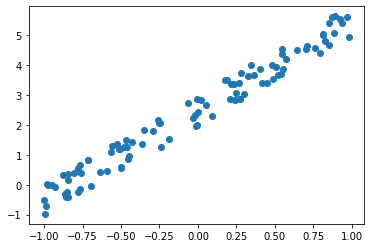

In [0]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [0]:
a.type

<function Tensor.type>

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6273)

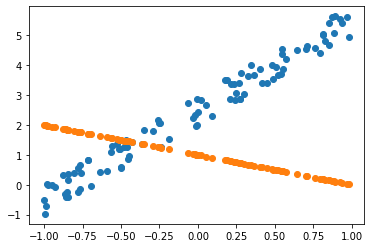

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

This a regression problem (have continuous data). Note normally predicted value is y_hat and actual y value is y. We see that our inital prediction is pretty bad. Now we want to make our guess better by changing our parameters. 

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(7.6273, grad_fn=<MeanBackward0>)
tensor(1.4233, grad_fn=<MeanBackward0>)
tensor(0.3842, grad_fn=<MeanBackward0>)
tensor(0.1660, grad_fn=<MeanBackward0>)
tensor(0.1196, grad_fn=<MeanBackward0>)
tensor(0.1097, grad_fn=<MeanBackward0>)
tensor(0.1076, grad_fn=<MeanBackward0>)
tensor(0.1072, grad_fn=<MeanBackward0>)
tensor(0.1071, grad_fn=<MeanBackward0>)
tensor(0.1070, grad_fn=<MeanBackward0>)


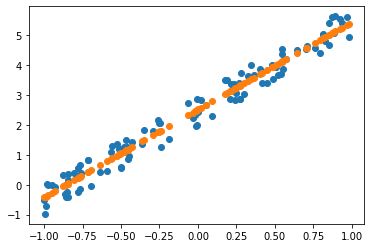

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy());

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

In [0]:
Batching gives us a performance boost because were not going through whole dataset
as many times

## Vocab

- Learning rate: multiply our gradient by
- Epoch: one rung through dataset
- Minibatch
- SGD
- Model / Architecture
- Parameters/Coefficients/Weights
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

Some things we'll see next week:
high bias (underfit)
high variance (overfit)
You might think that having just the right number of parameters will allow you to fit well but regularization is actually a big key. The validation set is what allows you to see if you are high bias/high variance.